In [2]:
import sys
sys.path.append('../..')

import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Individual

In [3]:
grid = 5
sub_grid = 5

folder = f'./threshold_tests-{grid}_{grid}-{sub_grid}_{sub_grid}/'

In [4]:
files = os.listdir(folder)
files = [file for file in files if file.endswith('-analysis.csv')] # Filter files

# Gather thresholds
theshold_scales = np.unique(np.array([int(file.split('-')[0][-1]) for file in files]))
theshold_scales.sort()

# Gather environment ids
environment_ids = np.unique(np.array([int(file.split('-')[1][-1]) for file in files]))
environment_ids.sort()

# Building results dataframe
rows = []
for thresh_scale in theshold_scales:
    for env_i in environment_ids:
        df = pd.read_csv(folder + f't_e{thresh_scale}-env_{env_i}-analysis.csv', index_col=0)

        rows.append({
            'threshold': thresh_scale,
            'environment': env_i,
            'convergence': df['converged']['mean'],
            'convergence_std': df['converged']['standard_deviation'],
            't_min_over_t': df['t_min_over_t']['success_mean'],
            't_min_over_t_std': df['t_min_over_t']['success_standard_deviation']
        })
results_df = pd.DataFrame(rows)

In [5]:
# source_positions = []
# for env_i in environment_ids:
#     df = pd.read_csv(folder + f't_e1-env_{env_i}.csv')
#     env_source_pos = np.array([int(part) for part in df['environment'][4].split('_')])
#     source_positions.append(env_source_pos)

## For all

In [6]:
def get_results(grid, subgrid) -> pd.DataFrame:
    folder = f'./threshold_tests-{grid}_{grid}-{sub_grid}_{sub_grid}/'

    # Gather files
    files = os.listdir(folder)
    files = [file for file in files if file.endswith('-analysis.csv')] # Filter files

    # Gather thresholds
    theshold_scales = np.unique(np.array([int(file.split('-')[0][-1]) for file in files]))
    theshold_scales.sort()

    # Gather environment ids
    environment_ids = np.unique(np.array([int(file.split('-')[1][-1]) for file in files]))
    environment_ids.sort()

    # Building results dataframe
    rows = []
    for thresh_scale in theshold_scales:
        for env_i in environment_ids:
            df = pd.read_csv(folder + f't_e{thresh_scale}-env_{env_i}-analysis.csv', index_col=0)

            rows.append({
                'threshold': thresh_scale,
                'environment': env_i,
                'convergence': df['converged']['mean'],
                'convergence_std': df['converged']['standard_deviation'],
                't_min_over_t': df['t_min_over_t']['success_mean'],
                't_min_over_t_std': df['t_min_over_t']['success_standard_deviation']
            })
    results_df = pd.DataFrame(rows)

    return results_df

In [7]:
all_test_grids = np.array([
    [5,5],
    [7,5],
    [9,5]
])

all_result_dfs = [get_results(grid, sub_grid) for grid, subgrid in all_test_grids]

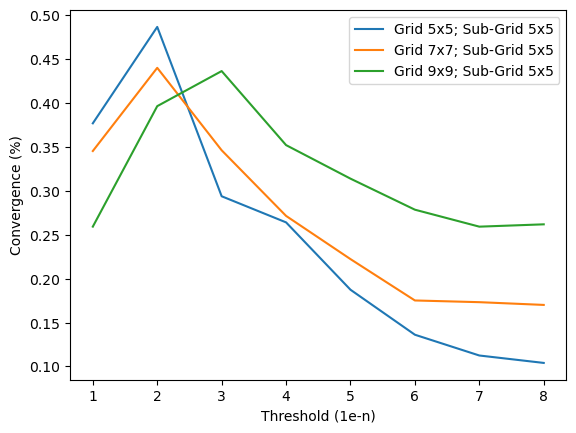

In [27]:
metric_label = 'Convergence'
for (grid, subgrid), res_df in zip(all_test_grids, all_result_dfs):
    metric = np.array(res_df.astype(float).groupby('threshold')[metric_label.lower()].mean())
    metric_std = np.array(res_df.astype(float).groupby('threshold')[metric_label.lower()].std())
    plt.errorbar(theshold_scales,
                 metric,
                #  yerr=metric_std,
                 label=f'Grid {grid}x{grid}; Sub-Grid {subgrid}x{subgrid}')

plt.xlabel('Threshold (1e-n)')
plt.ylabel(f'{metric_label} (%)')
plt.legend()
plt.show()

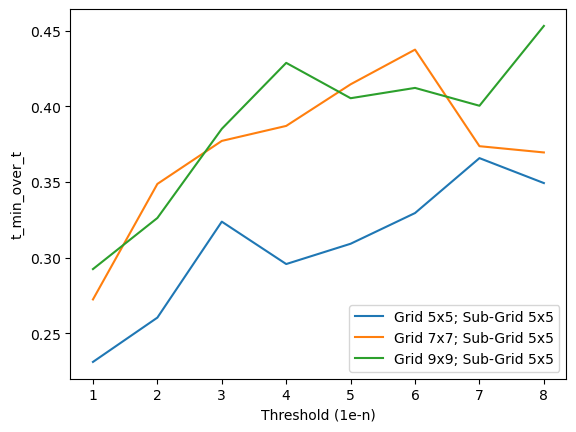

In [29]:
metric_label = 't_min_over_t'
for (grid, subgrid), res_df in zip(all_test_grids, all_result_dfs):
    metric = np.array(res_df.astype(float).groupby('threshold')[metric_label.lower()].mean())
    metric_std = np.array(res_df.astype(float).groupby('threshold')[metric_label.lower()].std())
    plt.errorbar(theshold_scales,
                 metric,
                #  yerr=metric_std,
                 label=f'Grid {grid}x{grid}; Sub-Grid {subgrid}x{subgrid}')

plt.xlabel('Threshold (1e-n)')
plt.ylabel(f'{metric_label}')
plt.legend()
plt.show()